## In-Class Activity 5: Linear Regression

### Load Data

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

In [116]:
df = pd.read_csv('../Data/Homes.csv')

### Describe Data

In [119]:
df.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [121]:
df.columns = df.columns.str.strip().str.replace('"', '')
df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    50 non-null     int64  
 1   List    50 non-null     int64  
 2   Living  50 non-null     int64  
 3   Rooms   50 non-null     int64  
 4   Beds    50 non-null     int64  
 5   Baths   50 non-null     int64  
 6   Age     50 non-null     int64  
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


***
The data set contains 50 homes. Here is what I believe each column represents:
- Sell: Selling price, in \\$1,000s
- List: Listing price, in \\$1,000s
- Living: Living area size, in 100s of square feet
- Rooms: Total number of rooms
- Beds: Number of bedrooms
- Baths: Number of bathrooms
- Age: Age of the home, in years
- Acres: Lot size, in acres
- Taxes: Annual property taxes, in \\$
***

In [126]:
df.describe()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


***
Below are a few basic insights we can draw from the summary statistics:
- The average selling price of a home is \\$170,360, which is lower than the average listing price of \\$178,340.
- Most homes have 3-4 bedrooms and 1-2 bathrooms.
- The homes in this data set range from 2 to 202 years old.
***

### EDA

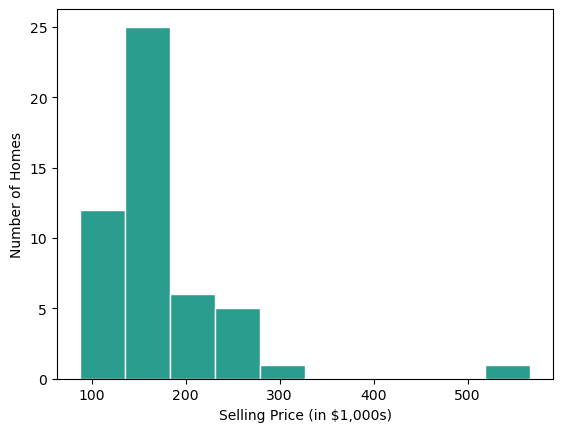

In [190]:
plt.hist(df["Sell"], bins=10, color="#2a9d8f", edgecolor="white")
plt.xlabel("Selling Price (in $1,000s)")
plt.ylabel("Number of Homes")
plt.show()

***
The above histogram visualizes the distribution of home selling prices by grouping them into 10 bins. This helps identify patterns in pricing. The distribution is right-skewed, with most homes selling between \\$100,000 and \\$200,000, while a few high-priced outliers (especially the one selling for more than \\$500,000) pull the average up.
***

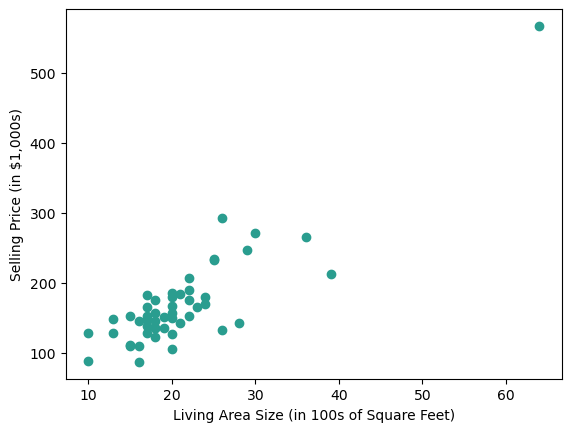

In [198]:
plt.scatter(df["Living"], df["Sell"], color="#2a9d8f")
plt.xlabel("Living Area Size (in 100s of Square Feet)")
plt.ylabel("Selling Price (in $1,000s)")
plt.show()

***
I created a scatter plot to explore the relationship between living area size and selling price. This helps determine if larger homes tend to sell for higher prices. The plot shows a strongly positive correlation, meaning that as living area increases, selling price is very likely to increase as well.
***

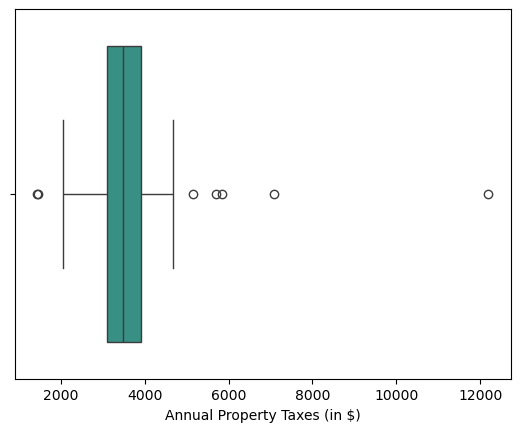

In [204]:
sb.boxplot(x=df["Taxes"], color="#2a9d8f")
plt.xlabel("Annual Property Taxes (in $)")
plt.show()

***
This box plot visualizes the distribution of annual property taxes, helping us identify trends and outliers. The majority of homes have property taxes between around \\$2,000 and around \\$4,500, with a median around \\$3,500. However, a few homes have significantly higher taxes, with the highest exceeding $12,000. The right-skewed distribution suggests that while most homes pay moderate taxes, a few properties have much higher tax burdens.
***

## Linear Regression

In [234]:
y = df.Sell
x = df.Taxes
x = sm.add_constant(x)
model_1 = sm.OLS(y, x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           7.22e-19
Time:                        23:46:42   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
Taxes          0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
The above regression model indicates that property taxes are a strong predictor of selling price. The R-squared value of 0.809 suggests that approximately 80.9% of the variation in selling prices can be explained by taxes alone, which is a strong relationship. Additionally, the p-value for taxes is 0.000, meaning the relationship is statistically significant (assuming that we use 0.05 as the significance threshold), and we can confidently say that taxes have a meaningful impact on selling prices. The coefficient for taxes is 0.0414, meaning that for each \\$1 increase in taxes, the selling price increases by approximately \\$41, on average. However, some concerns arise when looking at the skewness and kurtosis values, which indicate that the data may not be perfectly normally distributed (as illustrated by the EDA above). This could impact the reliability of the model's assumptions.
***

In [236]:
y = df.Sell
x = df.List
x = sm.add_constant(x)
model_2 = sm.OLS(y, x).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9312.
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           1.26e-56
Time:                        23:46:48   Log-Likelihood:                -152.97
No. Observations:                  50   AIC:                             309.9
Df Residuals:                      48   BIC:                             313.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3274      1.846      3.969      0.000       3.615      11.039
List           0.9142      0.009     96.499      0.000       0.895       0.933
==============================================================================
Omnibus:                        1.262   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                1.119
Skew:                          -0.355   Prob(JB):                        0.572
Kurtosis:                       2.817   Cond. No.                         483.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
Using listing price as the independent variable significantly improves the model. The R-squared increases from 0.809 to 0.995, meaning 99.5% of the variation in selling price is explained by listing price. The p-value (0.000) confirms statistical significance, and the coefficient (0.9142) suggests that for every \\$1 increase in listing price, the selling price increases by approximately \\$0.91, on average.

However, listing price is strongly correlated with selling price, making it almost redundant as a predictor. More broadly, both models above are limited because they each use only one independent variable, oversimplifying the factors that determine home prices. A multiple regression model incorporating variables such as living area, bedrooms, and home age may provide a more accurate prediction. Even with multiple predictors, key factors like neighborhood quality, mortgage rates, and overall economic trends are still missing. Additionally, these models assume a linear relationship, but real estate prices may follow more complex patterns.
***